# This file has 4 section:
- Multiple Linear Regression with use address dummy values in x
- Multiple Linear Regression without use address dummy values in x
- Polynomial Regression
- Multiple Linear Regression with use **LableEncoder()** in address

# 1- Multiple_Linear_Regression
## With Address Category

### Importing Needed Library

In [65]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.metrics import r2_score

### Reading the data in

In [66]:
df = pd.read_csv('housePrice.csv')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


### Delete NaN values

In [67]:
df = df.dropna()

### Check exist NaN 

In [68]:
df.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

### Convert Area from Object to int and restrict data

In [69]:
df['Area'] = df['Area'].str.replace(',', '')
df['Area'] = np.int64(df['Area'])
df = df[df['Area'] < 1000]


### Convert Parking, Warehouse, Elevator from bool to int

In [70]:
df['Parking'] = df['Parking'].astype(int)
df['Warehouse'] = df['Warehouse'].astype(int)
df['Elevator'] = df['Elevator'].astype(int)


### Convert Address from Object to unit8 (0 or 1 matrix)

In [71]:
Address_dummy = pd.get_dummies(df['Address'])
df = pd.concat([df, Address_dummy], axis=1).drop(['Address', 'Price'], axis=1)

### take a look at the dataset

In [72]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Price(USD),Abazar,Abbasabad,Absard,Abuzar,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
0,63,1,1,1,1,61666.67,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,60,1,1,1,1,61666.67,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79,2,1,1,1,18333.33,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,95,2,1,1,1,30083.33,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,123,2,1,1,1,233333.33,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### take a look at the dataset's type

In [73]:
df.dtypes

Area           int64
Room           int64
Parking        int32
Warehouse      int32
Elevator       int32
               ...  
Yousef Abad    uint8
Zafar          uint8
Zaferanieh     uint8
Zargandeh      uint8
Zibadasht      uint8
Length: 198, dtype: object

### plot Area values with respect to Price(USD):


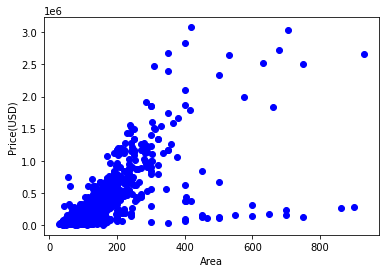

In [74]:
plt.scatter(df['Area'], df['Price(USD)'],  color='blue')
plt.xlabel("Area")
plt.ylabel("Price(USD)")
plt.show()

### Creating train and test dataset

In [75]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

### Train data distribution

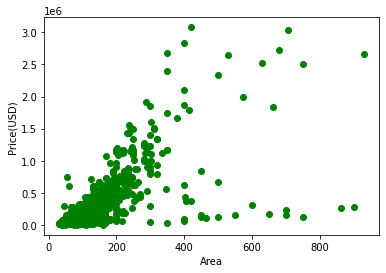

In [76]:
plt.scatter(train['Area'], train['Price(USD)'],  color='green')
plt.xlabel("Area")
plt.ylabel("Price(USD)")
plt.show()

### Multiple Regression Model

In [77]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator',
       'Abazar', 'Abbasabad', 'Absard', 'Abuzar',
       'Afsarieh', 'Ahang', 'Air force', 'Ajudaniye', 'Alborz Complex',
       'Aliabad South', 'Amir Bahador', 'Amirabad', 'Amirieh', 'Andisheh',
       'Aqdasieh', 'Araj', 'Argentina', 'Atabak', 'Azadshahr',
       'Azarbaijan', 'Azari', 'Baghestan', 'Bahar', 'Baqershahr',
       'Beryanak', 'Boloorsazi', 'Central Janatabad', 'Chahardangeh',
       'Chardangeh', 'Chardivari', 'Chidz', 'Damavand', 'Darabad',
       'Darakeh', 'Darband', 'Daryan No', 'Dehkade Olampic', 'Dezashib',
       'Dolatabad', 'Dorous', 'East Ferdows Boulevard', 'East Pars',
       'Ekbatan', 'Ekhtiarieh', 'Elahieh', 'Elm-o-Sanat', 'Enghelab',
       'Eram', 'Eskandari', 'Fallah', 'Farmanieh', 'Fatemi',
       'Feiz Garden', 'Firoozkooh', 'Firoozkooh Kuhsar', 'Gandhi',
       'Garden of Saba', 'Gheitarieh', 'Ghiyamdasht', 'Ghoba', 'Gholhak',
       'Gisha', 'Golestan', 'Haft Tir', 'Hakimiyeh', 'Hashemi',
       'Hassan Abad', 'Hekmat', 'Heravi', 'Heshmatieh', 'Hor Square',
       'Islamshahr', 'Islamshahr Elahieh', 'Javadiyeh', 'Jeyhoon',
       'Jordan', 'Kahrizak', 'Kamranieh', 'Karimkhan', 'Karoon',
       'Kazemabad', 'Keshavarz Boulevard', 'Khademabad Garden',
       'Khavaran', 'Komeil', 'Koohsar', 'Kook', 'Lavasan', 'Lavizan',
       'Mahallati', 'Mahmoudieh', 'Majidieh', 'Malard', 'Marzdaran',
       'Mehrabad', 'Mehrabad River River', 'Mehran', 'Mirdamad',
       'Mirza Shirazi', 'Moniriyeh', 'Narmak', 'Nasim Shahr', 'Nawab',
       'Naziabad', 'Nezamabad', 'Niavaran', 'North Program Organization',
       'Northern Chitgar', 'Northern Janatabad', 'Northern Suhrawardi',
       'Northren Jamalzadeh', 'Ostad Moein', 'Ozgol', 'Pakdasht',
       'Pakdasht KhatunAbad', 'Parand', 'Parastar', 'Pardis', 'Pasdaran',
       'Persian Gulf Martyrs Lake', 'Pirouzi', 'Pishva', 'Punak',
       'Qalandari', 'Qarchak', 'Qasr-od-Dasht', 'Qazvin Imamzadeh Hassan',
       'Railway', 'Ray', 'Ray - Montazeri', 'Ray - Pilgosh', 'Razi',
       'Republic', 'Robat Karim', 'Rudhen', 'Saadat Abad', 'SabaShahr',
       'Sabalan', 'Sadeghieh', 'Safadasht', 'Salehabad', 'Salsabil',
       'Sattarkhan', 'Seyed Khandan', 'Shadabad', 'Shahedshahr',
       'Shahr-e-Ziba', 'ShahrAra', 'Shahrake Apadana', 'Shahrake Azadi',
       'Shahrake Gharb', 'Shahrake Madaen', 'Shahrake Qods',
       'Shahrake Quds', 'Shahrake Shahid Bagheri', 'Shahrakeh Naft',
       'Shahran', 'Shahryar', 'Shams Abad', 'Shoosh', 'Si Metri Ji',
       'Sohanak', 'Southern Chitgar', 'Southern Janatabad',
       'Southern Program Organization', 'Southern Suhrawardi', 'Tajrish',
       'Tarasht', 'Taslihat', 'Tehran Now', 'Tehransar',
       'Telecommunication', 'Tenant', 'Thirteen November', 'Vahidieh',
       'Vahidiyeh', 'Valiasr', 'Vanak', 'Varamin - Beheshti', 'Velenjak',
       'Villa', 'Water Organization', 'Waterfall',
       'West Ferdows Boulevard', 'West Pars', 'Yaftabad', 'Yakhchiabad',
       'Yousef Abad', 'Zafar', 'Zaferanieh', 'Zargandeh', 'Zibadasht']])
y = np.asanyarray(train[['Price(USD)']])
regr.fit (x, y)


print ('Coefficients: ', regr.coef_)
print(f'Intercepts: {regr.intercept_}')

Coefficients:  [[ 2.42887488e+03  9.57193393e+03 -2.52446208e+04 -4.18500890e+03
  -1.09201277e+04 -1.02538155e+14 -1.02538155e+14 -1.02538156e+14
  -1.02538155e+14 -1.02538155e+14 -1.02538155e+14 -1.02538155e+14
  -1.02538155e+14 -1.02538155e+14 -2.73969143e+15 -1.02538155e+14
  -1.02538155e+14 -1.02538155e+14 -1.02538155e+14 -1.02538155e+14
  -1.02538155e+14 -1.02538154e+14 -1.02538155e+14 -1.02538155e+14
  -1.02538155e+14 -1.02538155e+14 -1.02538155e+14 -1.02538155e+14
  -1.02538155e+14 -1.02538155e+14 -1.02538155e+14 -1.02538155e+14
  -1.02538155e+14 -4.10911666e+13 -8.37648028e+13 -1.02538155e+14
  -1.02538155e+14 -1.02538155e+14 -1.02538155e+14 -1.02538155e+14
  -1.02538155e+14 -1.02538155e+14 -1.02538155e+14 -1.02538155e+14
  -1.02538155e+14 -1.02538155e+14 -1.02538155e+14 -1.02538155e+14
  -1.02538155e+14 -1.02538154e+14 -1.02538155e+14 -1.02538155e+14
  -1.02538155e+14 -1.02538155e+14 -1.02538155e+14 -1.02538155e+14
  -1.02538155e+14 -1.02538155e+14 -1.02538155e+14 -1.02538155

### Prediction

In [78]:
y_hat= regr.predict(test[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator',
      'Abazar', 'Abbasabad', 'Absard', 'Abuzar',
      'Afsarieh', 'Ahang', 'Air force', 'Ajudaniye', 'Alborz Complex',
      'Aliabad South', 'Amir Bahador', 'Amirabad', 'Amirieh', 'Andisheh',
      'Aqdasieh', 'Araj', 'Argentina', 'Atabak', 'Azadshahr',
      'Azarbaijan', 'Azari', 'Baghestan', 'Bahar', 'Baqershahr',
      'Beryanak', 'Boloorsazi', 'Central Janatabad', 'Chahardangeh',
      'Chardangeh', 'Chardivari', 'Chidz', 'Damavand', 'Darabad',
      'Darakeh', 'Darband', 'Daryan No', 'Dehkade Olampic', 'Dezashib',
      'Dolatabad', 'Dorous', 'East Ferdows Boulevard', 'East Pars',
      'Ekbatan', 'Ekhtiarieh', 'Elahieh', 'Elm-o-Sanat', 'Enghelab',
      'Eram', 'Eskandari', 'Fallah', 'Farmanieh', 'Fatemi',
      'Feiz Garden', 'Firoozkooh', 'Firoozkooh Kuhsar', 'Gandhi',
      'Garden of Saba', 'Gheitarieh', 'Ghiyamdasht', 'Ghoba', 'Gholhak',
      'Gisha', 'Golestan', 'Haft Tir', 'Hakimiyeh', 'Hashemi',
      'Hassan Abad', 'Hekmat', 'Heravi', 'Heshmatieh', 'Hor Square',
      'Islamshahr', 'Islamshahr Elahieh', 'Javadiyeh', 'Jeyhoon',
      'Jordan', 'Kahrizak', 'Kamranieh', 'Karimkhan', 'Karoon',
      'Kazemabad', 'Keshavarz Boulevard', 'Khademabad Garden',
      'Khavaran', 'Komeil', 'Koohsar', 'Kook', 'Lavasan', 'Lavizan',
      'Mahallati', 'Mahmoudieh', 'Majidieh', 'Malard', 'Marzdaran',
      'Mehrabad', 'Mehrabad River River', 'Mehran', 'Mirdamad',
      'Mirza Shirazi', 'Moniriyeh', 'Narmak', 'Nasim Shahr', 'Nawab',
      'Naziabad', 'Nezamabad', 'Niavaran', 'North Program Organization',
      'Northern Chitgar', 'Northern Janatabad', 'Northern Suhrawardi',
      'Northren Jamalzadeh', 'Ostad Moein', 'Ozgol', 'Pakdasht',
      'Pakdasht KhatunAbad', 'Parand', 'Parastar', 'Pardis', 'Pasdaran',
      'Persian Gulf Martyrs Lake', 'Pirouzi', 'Pishva', 'Punak',
      'Qalandari', 'Qarchak', 'Qasr-od-Dasht', 'Qazvin Imamzadeh Hassan',
      'Railway', 'Ray', 'Ray - Montazeri', 'Ray - Pilgosh', 'Razi',
      'Republic', 'Robat Karim', 'Rudhen', 'Saadat Abad', 'SabaShahr',
      'Sabalan', 'Sadeghieh', 'Safadasht', 'Salehabad', 'Salsabil',
      'Sattarkhan', 'Seyed Khandan', 'Shadabad', 'Shahedshahr',
      'Shahr-e-Ziba', 'ShahrAra', 'Shahrake Apadana', 'Shahrake Azadi',
      'Shahrake Gharb', 'Shahrake Madaen', 'Shahrake Qods',
      'Shahrake Quds', 'Shahrake Shahid Bagheri', 'Shahrakeh Naft',
      'Shahran', 'Shahryar', 'Shams Abad', 'Shoosh', 'Si Metri Ji',
      'Sohanak', 'Southern Chitgar', 'Southern Janatabad',
      'Southern Program Organization', 'Southern Suhrawardi', 'Tajrish',
      'Tarasht', 'Taslihat', 'Tehran Now', 'Tehransar',
      'Telecommunication', 'Tenant', 'Thirteen November', 'Vahidieh',
      'Vahidiyeh', 'Valiasr', 'Vanak', 'Varamin - Beheshti', 'Velenjak',
      'Villa', 'Water Organization', 'Waterfall',
      'West Ferdows Boulevard', 'West Pars', 'Yaftabad', 'Yakhchiabad',
      'Yousef Abad', 'Zafar', 'Zaferanieh', 'Zargandeh', 'Zibadasht']])
x = np.asanyarray(test[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator',
      'Abazar', 'Abbasabad', 'Absard', 'Abuzar',
      'Afsarieh', 'Ahang', 'Air force', 'Ajudaniye', 'Alborz Complex',
      'Aliabad South', 'Amir Bahador', 'Amirabad', 'Amirieh', 'Andisheh',
      'Aqdasieh', 'Araj', 'Argentina', 'Atabak', 'Azadshahr',
      'Azarbaijan', 'Azari', 'Baghestan', 'Bahar', 'Baqershahr',
      'Beryanak', 'Boloorsazi', 'Central Janatabad', 'Chahardangeh',
      'Chardangeh', 'Chardivari', 'Chidz', 'Damavand', 'Darabad',
      'Darakeh', 'Darband', 'Daryan No', 'Dehkade Olampic', 'Dezashib',
      'Dolatabad', 'Dorous', 'East Ferdows Boulevard', 'East Pars',
      'Ekbatan', 'Ekhtiarieh', 'Elahieh', 'Elm-o-Sanat', 'Enghelab',
      'Eram', 'Eskandari', 'Fallah', 'Farmanieh', 'Fatemi',
      'Feiz Garden', 'Firoozkooh', 'Firoozkooh Kuhsar', 'Gandhi',
      'Garden of Saba', 'Gheitarieh', 'Ghiyamdasht', 'Ghoba', 'Gholhak',
      'Gisha', 'Golestan', 'Haft Tir', 'Hakimiyeh', 'Hashemi',
      'Hassan Abad', 'Hekmat', 'Heravi', 'Heshmatieh', 'Hor Square',
      'Islamshahr', 'Islamshahr Elahieh', 'Javadiyeh', 'Jeyhoon',
      'Jordan', 'Kahrizak', 'Kamranieh', 'Karimkhan', 'Karoon',
      'Kazemabad', 'Keshavarz Boulevard', 'Khademabad Garden',
      'Khavaran', 'Komeil', 'Koohsar', 'Kook', 'Lavasan', 'Lavizan',
      'Mahallati', 'Mahmoudieh', 'Majidieh', 'Malard', 'Marzdaran',
      'Mehrabad', 'Mehrabad River River', 'Mehran', 'Mirdamad',
      'Mirza Shirazi', 'Moniriyeh', 'Narmak', 'Nasim Shahr', 'Nawab',
      'Naziabad', 'Nezamabad', 'Niavaran', 'North Program Organization',
      'Northern Chitgar', 'Northern Janatabad', 'Northern Suhrawardi',
      'Northren Jamalzadeh', 'Ostad Moein', 'Ozgol', 'Pakdasht',
      'Pakdasht KhatunAbad', 'Parand', 'Parastar', 'Pardis', 'Pasdaran',
      'Persian Gulf Martyrs Lake', 'Pirouzi', 'Pishva', 'Punak',
      'Qalandari', 'Qarchak', 'Qasr-od-Dasht', 'Qazvin Imamzadeh Hassan',
      'Railway', 'Ray', 'Ray - Montazeri', 'Ray - Pilgosh', 'Razi',
      'Republic', 'Robat Karim', 'Rudhen', 'Saadat Abad', 'SabaShahr',
      'Sabalan', 'Sadeghieh', 'Safadasht', 'Salehabad', 'Salsabil',
      'Sattarkhan', 'Seyed Khandan', 'Shadabad', 'Shahedshahr',
      'Shahr-e-Ziba', 'ShahrAra', 'Shahrake Apadana', 'Shahrake Azadi',
      'Shahrake Gharb', 'Shahrake Madaen', 'Shahrake Qods',
      'Shahrake Quds', 'Shahrake Shahid Bagheri', 'Shahrakeh Naft',
      'Shahran', 'Shahryar', 'Shams Abad', 'Shoosh', 'Si Metri Ji',
      'Sohanak', 'Southern Chitgar', 'Southern Janatabad',
      'Southern Program Organization', 'Southern Suhrawardi', 'Tajrish',
      'Tarasht', 'Taslihat', 'Tehran Now', 'Tehransar',
      'Telecommunication', 'Tenant', 'Thirteen November', 'Vahidieh',
      'Vahidiyeh', 'Valiasr', 'Vanak', 'Varamin - Beheshti', 'Velenjak',
      'Villa', 'Water Organization', 'Waterfall',
      'West Ferdows Boulevard', 'West Pars', 'Yaftabad', 'Yakhchiabad',
      'Yousef Abad', 'Zafar', 'Zaferanieh', 'Zargandeh', 'Zibadasht']])
y = np.asanyarray(test[['Price(USD)']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))


print('Variance score: %.2f' % regr.score(x, y))
print("R2-score: %.2f" % r2_score(y, y_hat))

Residual sum of squares: 9820685332599915819361632256.00
Variance score: -169444349177228480.00
R2-score: -169444349177228480.00


c:\Users\sinad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


# 2- Multiple_Linear_Regression
## Without Address Category

In [79]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator']])
y = np.asanyarray(train[['Price(USD)']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print(f'Intercepts: {regr.intercept_}')

Coefficients:  [[ 2376.8524777  54617.92744156 -7814.44584953 34121.56572541
  28402.91585363]]
Intercepts: [-234907.23701821]


In [80]:
y_hat= regr.predict(test[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator']])
x = np.asanyarray(test[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator']])
y = np.asanyarray(test[['Price(USD)']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))
print("R2-score: %.2f" % r2_score(y, y_hat))

Residual sum of squares: 28257512245.06
Variance score: 0.51
R2-score: 0.51


c:\Users\sinad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


# 3- Polynomial Regression

### plot Area values with respect to Price(USD):


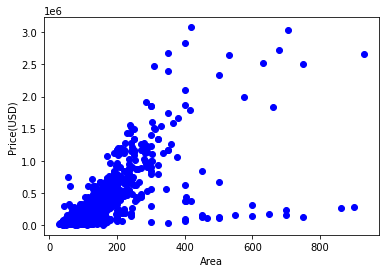

In [81]:
plt.scatter(df['Area'], df['Price(USD)'],  color='blue')
plt.xlabel("Area")
plt.ylabel("Price(USD)")
plt.show()

### Train data distribution

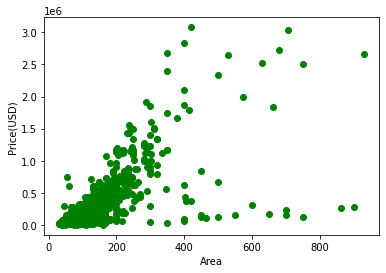

In [82]:
plt.scatter(train['Area'], train['Price(USD)'],  color='green')
plt.xlabel("Area")
plt.ylabel("Price(USD)")
plt.show()

In [83]:
train_x = np.asanyarray(train[['Area']])
train_y = np.asanyarray(train[['Price(USD)']])

test_x = np.asanyarray(test[['Area']])
test_y = np.asanyarray(test[['Price(USD)']])


poly = PolynomialFeatures(degree=5)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.00000000e+00, 6.30000000e+01, 3.96900000e+03, 2.50047000e+05,
        1.57529610e+07, 9.92436543e+08],
       [1.00000000e+00, 6.00000000e+01, 3.60000000e+03, 2.16000000e+05,
        1.29600000e+07, 7.77600000e+08],
       [1.00000000e+00, 7.90000000e+01, 6.24100000e+03, 4.93039000e+05,
        3.89500810e+07, 3.07705640e+09],
       ...,
       [1.00000000e+00, 8.30000000e+01, 6.88900000e+03, 5.71787000e+05,
        4.74583210e+07, 3.93904064e+09],
       [1.00000000e+00, 7.50000000e+01, 5.62500000e+03, 4.21875000e+05,
        3.16406250e+07, 2.37304688e+09],
       [1.00000000e+00, 8.20000000e+01, 6.72400000e+03, 5.51368000e+05,
        4.52121760e+07, 3.70739843e+09]])

### use **LinearRegression()** function

In [84]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.00000000e+00 -5.96535233e+03  6.87421193e+01 -1.87317572e-01
   2.02986193e-04 -7.74980435e-08]]
Intercept:  [200701.37251869]


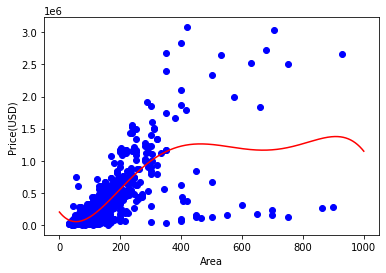

In [85]:
plt.scatter(train.Area, train['Price(USD)'],  color='blue')
XX = np.arange(0.0, 1000.0, 0.1)
yy = (clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)+ clf.coef_[0][3]*np.power(XX, 3)
    + clf.coef_[0][4]*np.power(XX, 4)+ clf.coef_[0][5]*np.power(XX, 5))
plt.plot(XX, yy, '-r' )
plt.xlabel("Area")
plt.ylabel("Price(USD)")
plt.show()

### Evaluation

In [86]:
test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Mean absolute error: 75575.61
Residual sum of squares (MSE): 21405817571.04
R2-score: 0.63


# 4- Multiple Linear Regression
## With use **LableEncoder()**

In [87]:
df = pd.read_csv('housePrice.csv')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [88]:
df = df.dropna()

In [89]:
df['Area'] = df['Area'].str.replace(',', '')
df['Area'] = np.int64(df['Area'])
df = df[df['Area'] < 1000]


In [90]:
df['Parking'] = df['Parking'].astype(int)
df['Warehouse'] = df['Warehouse'].astype(int)
df['Elevator'] = df['Elevator'].astype(int)


In [91]:
label_encoder = LabelEncoder()

df['Address'] = label_encoder.fit_transform(df['Address'])
df['Address'].unique()

array([156, 117, 152, 150, 106,  13, 183, 100, 135, 188,  71, 120, 154,
        99, 179,  12, 163, 141, 190,  52, 181, 147,  61, 128,   1, 111,
        50, 115, 122, 125,  14, 113, 127,  26,  40, 114, 142,  21, 157,
       108,  35, 164, 134, 184,   4,  93,  39, 138,  27,  23,  74,  88,
       158,  51,  81,  76, 124, 110,  19,  22, 119,  24,  69,  45,  62,
       146, 118,  29,  57,  77,  60,  68,  65,  36,  31, 132, 189, 126,
       105, 176, 123,  10,  43,  42,   2,  63,  89, 112, 166,   0,  85,
        67, 116,  87,  91, 162,  78, 160,  79, 107,  41,  86,   6, 161,
        84,  18, 191,  11,  37,  44,  97, 131,  75,  90, 145, 185,  96,
       101, 172,  28,  49,  48, 155,   7, 170, 102, 187, 109, 180,  64,
       104,  56, 167,  20, 148,  15, 174,  92, 149,  34, 177, 169,  32,
        47,  17, 137, 136, 151, 182,   5, 140, 121,  46,  72, 129,  54,
        59,  94, 165,   3,  38,  70, 168,  80, 133, 130,  58, 171,  98,
        55,  16, 143, 153, 139,  82,  66,  30,  83,  25,  95, 17

In [92]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,1,1,1,156,1.850000e+09,61666.67
1,60,1,1,1,1,156,1.850000e+09,61666.67
2,79,2,1,1,1,117,5.500000e+08,18333.33
3,95,2,1,1,1,152,9.025000e+08,30083.33
4,123,2,1,1,1,150,7.000000e+09,233333.33


In [93]:
df.dtypes

Area            int64
Room            int64
Parking         int32
Warehouse       int32
Elevator        int32
Address         int32
Price         float64
Price(USD)    float64
dtype: object

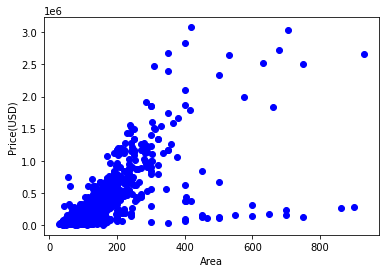

In [94]:
plt.scatter(df['Area'], df['Price(USD)'],  color='blue')
plt.xlabel("Area")
plt.ylabel("Price(USD)")
plt.show()

In [95]:
cdf = df[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price(USD)']]
cdf.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price(USD)
0,63,1,1,1,1,156,61666.67
1,60,1,1,1,1,156,61666.67
2,79,2,1,1,1,117,18333.33
3,95,2,1,1,1,152,30083.33
4,123,2,1,1,1,150,233333.33


In [96]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

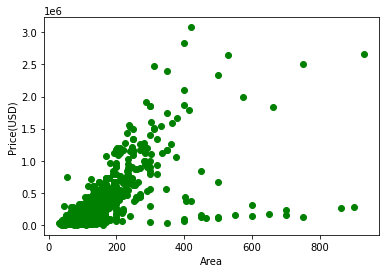

In [97]:
plt.scatter(train['Area'], train['Price(USD)'],  color='green')
plt.xlabel("Area")
plt.ylabel("Price(USD)")
plt.show()

In [98]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address']])
y = np.asanyarray(train[['Price(USD)']])
regr.fit (x, y)

print ('Coefficients: ', regr.coef_)
print(f'Intercepts: {regr.intercept_}')

Coefficients:  [[ 2.13454641e+03  6.64124651e+04 -1.89901152e+03  4.71938263e+04
   3.60246698e+04  4.13687311e+01]]
Intercepts: [-262153.79170903]


In [99]:
y_hat= regr.predict(test[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address']])
x = np.asanyarray(test[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address']])
y = np.asanyarray(test[['Price(USD)']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))


print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 31540361590.58
Variance score: 0.61


c:\Users\sinad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
